In [34]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Ecommerce Market Analysis'
     '</div>')

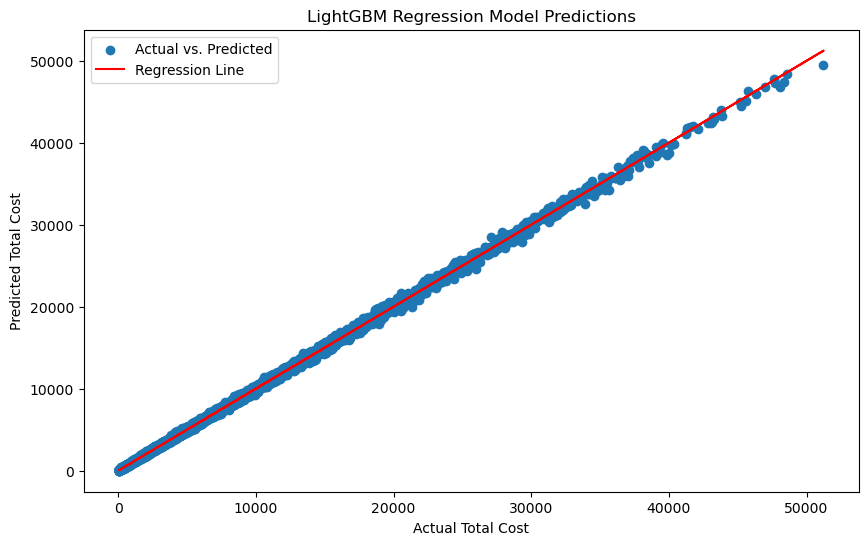

In [103]:
# MACHINE LEARNING MODELS ADOPTION:

# RECOMMEND Top Cost predictors: LightGBM Regression Model out of 6 models

# Highest stats:

# Mean Absolute Error (MAE): 108.33597644044941
# R-squared: 0.9994135312443473

# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("LightGBM Regression Model Predictions")
plt.legend()
plt.show()

In [10]:
import pandas as pd                     # library for data manipulation and preparation           
import seaborn as sns                   # library for customized data visualization
import plotly.express as px             # library for customized data visualization
from matplotlib import pyplot as plt    # library for customized data visualization

# Load the datasets
try:
    customer_df = pd.read_csv("customer.csv")
    purchase_df = pd.read_csv("purchase.csv")
except FileNotFoundError:
    print("Error: One or both of the input files (customer.csv or purchase.csv) were not found.")
    exit()

# Merge the DataFrames on 'customer_id'
merged_df = pd.merge(customer_df, purchase_df, on='customer_id', how='inner')

# Print the merged DataFrame
print(merged_df)

# Save the merged DataFrame to a new CSV file (optional)
merged_df.to_csv("merged_data.csv", index=False)


      customer_id first_name last_name  gender  age country  income  \
0         CS00001    Isadora     Porto  Female   19  Brazil  117196   
1         CS00001    Isadora     Porto  Female   19  Brazil  117196   
2         CS00001    Isadora     Porto  Female   19  Brazil  117196   
3         CS00001    Isadora     Porto  Female   19  Brazil  117196   
4         CS00001    Isadora     Porto  Female   19  Brazil  117196   
...           ...        ...       ...     ...  ...     ...     ...   
49995     CS01000   Isabella   Ribeiro  Female   39  Brazil   99320   
49996     CS01000   Isabella   Ribeiro  Female   39  Brazil   99320   
49997     CS01000   Isabella   Ribeiro  Female   39  Brazil   99320   
49998     CS01000   Isabella   Ribeiro  Female   39  Brazil   99320   
49999     CS01000   Isabella   Ribeiro  Female   39  Brazil   99320   

         order_id      product_name  \
0      ODSHP00001         Furniture   
1      ODSHP01001             Jeans   
2      ODSHP02001  Wireless Sp

In [19]:
# print data structure, shape, size, header, statistics:

try:
    df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: File not found.")
    exit()

# Check DataFrame information
print("DataFrame Information:")
df.info()
print("\n")

# Check DataFrame structure (first few rows)
print("DataFrame Structure:")
print(df.head())
print("\n")

# Check basic statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe()) 

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    50000 non-null  object 
 1   first_name     50000 non-null  object 
 2   last_name      50000 non-null  object 
 3   gender         50000 non-null  object 
 4   age            50000 non-null  int64  
 5   country        50000 non-null  object 
 6   income         50000 non-null  int64  
 7   order_id       50000 non-null  object 
 8   product_name   50000 non-null  object 
 9   description    50000 non-null  object 
 10  price          50000 non-null  float64
 11  discount       50000 non-null  float64
 12  tax            50000 non-null  float64
 13  order_date     50000 non-null  object 
 14  quantity       50000 non-null  int64  
 15  shipping_cost  50000 non-null  float64
 16  shipping_date  50000 non-null  object 
dtypes: float64(4), int64(3), ob

In [26]:
import pandas as pd

# Load the merged data
merged_df = pd.read_csv("merged_data.csv")

try:
  # Attempt conversion with the specified format (%d-%m-%Y)
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
  # If conversion fails, try inferring formats for each element
  print("Falling back to inferring date formats...")
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Verify the changes
print(merged_df.info()) 


Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_17244\1784170422.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_17244\1784170422.py:14: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    50000 non-null  object        
 1   first_name     50000 non-null  object        
 2   last_name      50000 non-null  object        
 3   gender         50000 non-null  object        
 4   age            50000 non-null  int64         
 5   country        50000 non-null  object        
 6   income         50000 non-null  int64         
 7   order_id       50000 non-null  object        
 8   product_name   50000 non-null  object        
 9   description    50000 non-null  object        
 10  price          50000 non-null  float64       
 11  discount       50000 non-null  float64       
 12  tax            50000 non-null  float64       
 13  order_date     30651 non-null  datetime64[ns]
 14  quantity       50000 non-null  int64         
 15  shipping_cost  5000

In [30]:
df.head(3)

,customer_id,first_name,last_name,gender,age,country,income,order_id,product_name,description,price,discount,tax,order_date,quantity,shipping_cost,shipping_date
0,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,29-05-2020
1,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP01001,Jeans,Make a statement with these stylish and durabl...,251.69,0.18,0.02,1/9/2019,8,21.67,4/9/2019
2,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP02001,Wireless Speaker,Stream your favorite music wirelessly with thi...,1711.04,0.48,0.03,24-04-2022,8,45.72,1/5/2022


In [33]:
df.head(-1)

,customer_id,first_name,last_name,gender,age,country,income,order_id,product_name,description,price,discount,tax,order_date,quantity,shipping_cost,shipping_date
0,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,29-05-2020
1,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP01001,Jeans,Make a statement with these stylish and durabl...,251.69,0.18,0.02,1/9/2019,8,21.67,4/9/2019
2,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP02001,Wireless Speaker,Stream your favorite music wirelessly with thi...,1711.04,0.48,0.03,24-04-2022,8,45.72,1/5/2022
3,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP03001,Jacket,Stay warm and fashionable with this trendy jac...,110.61,0.28,0.06,4/1/2020,9,48.17,10/1/2020
4,CS00001,Isadora,Porto,Female,19,Brazil,117196,ODSHP04001,Sweater,Keep cozy and stylish with this soft and warm ...,135.52,0.32,0.06,10/10/2020,2,10.79,11/10/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,CS01000,Isabella,Ribeiro,Female,39,Brazil,99320,ODSHP45000,Rugs,Add warmth and texture to your floors with the...,2216.44,0.06,0.08,21-02-2021,9,5.52,4/3/2021
49995,CS01000,Isabella,Ribeiro,Female,39,Brazil,99320,ODSHP46000,Jacket,Stay warm and fashionable with this trendy jac...,95.17,0.44,0.04,12/2/2021,8,39.70,25-02-2021
49996,CS01000,Isabella,Ribeiro,Female,39,Brazil,99320,ODSHP47000,Jeans,Make a statement with these stylish and durabl...,92.97,0.31,0.07,22-08-2022,2,37.79,5/9/2022
49997,CS01000,Isabella,Ribeiro,Female,39,Brazil,99320,ODSHP48000,Sports Shoes,Enhance your athletic performance with these h...,151.18,0.40,0.05,5/12/2019,7,34.03,11/12/2019


In [35]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'EDA Chart Visualization Analysis'
     '</div>')

In [2]:
import pandas as pd                     # library for data manipulation and preparation           
import seaborn as sns                   # library for customized data visualization
import plotly.express as px             # library for customized data visualization
from matplotlib import pyplot as plt    # library for customized data visualization

# Load the merged data (assuming the file is in the same directory)
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Calculate total revenue per customer
customer_revenue = merged_df.groupby('customer_id')['total_cost'].sum().reset_index(name='total_revenue')

# Merge total revenue back to the main DataFrame
merged_df = pd.merge(merged_df, customer_revenue, on='customer_id', how='left')

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_6680\3415972131.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_6680\3415972131.py:20: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


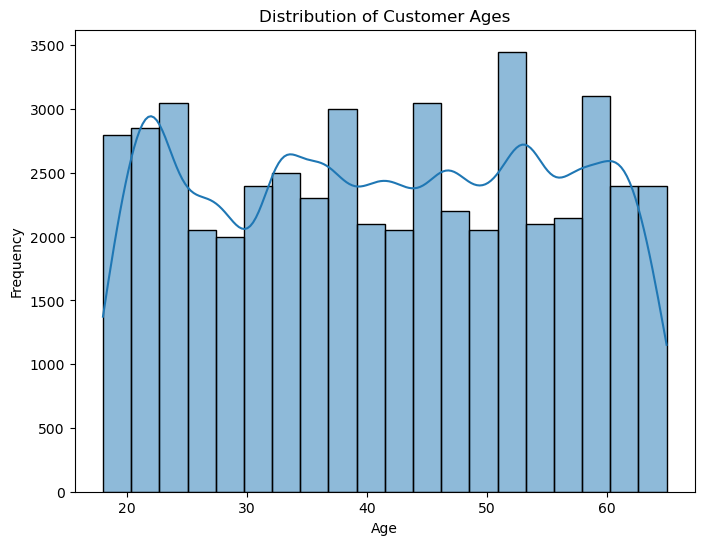

In [3]:
# 1. Histogram of Customer Ages
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['age'], bins=20, kde=True)
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

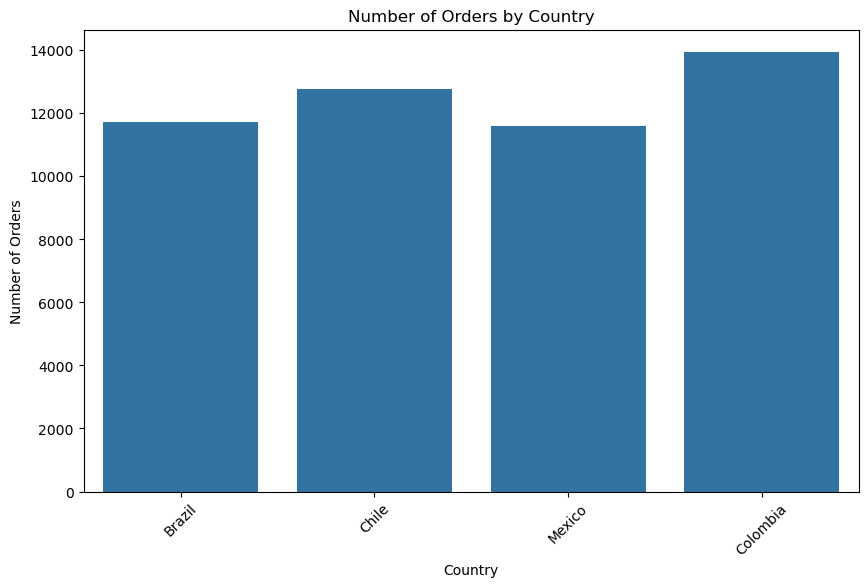

In [4]:
# 2. Bar Chart of Orders by Country
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=merged_df)
plt.title("Number of Orders by Country")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

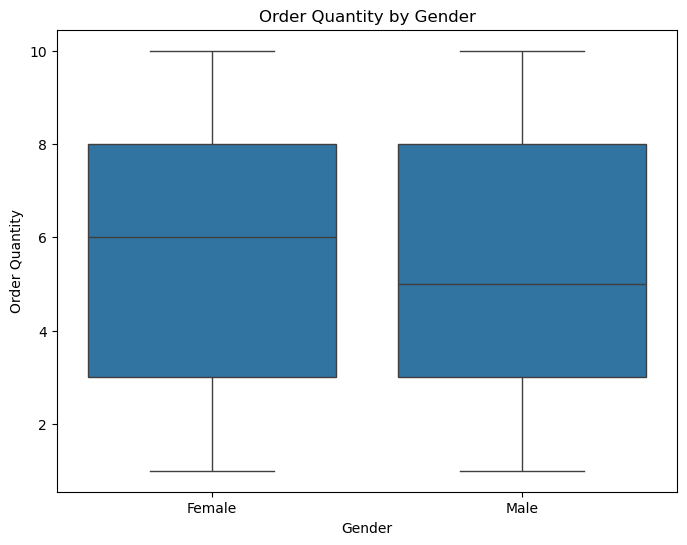

In [5]:
# 3. Box Plot of Order Quantity by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='quantity', data=merged_df)
plt.title("Order Quantity by Gender")
plt.xlabel("Gender")
plt.ylabel("Order Quantity")
plt.show()

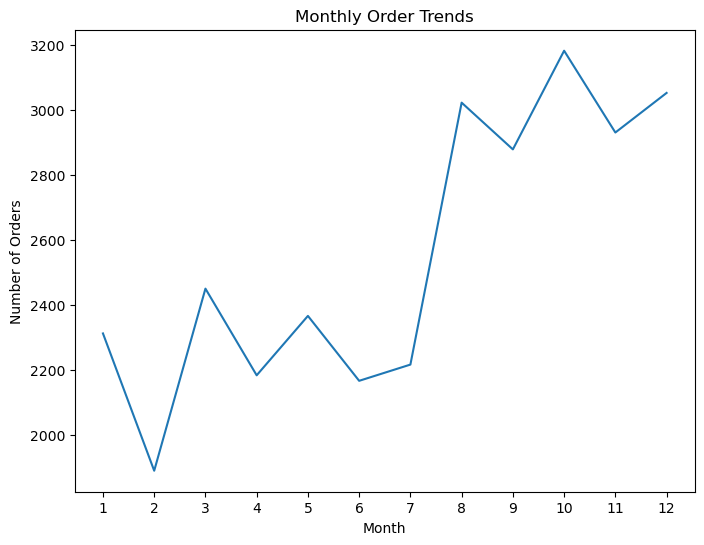

In [6]:
# 4. Line Plot of Monthly Order Trends (if 'order_date' is in datetime format)
if 'order_date' in merged_df.columns and pd.api.types.is_datetime64_any_dtype(merged_df['order_date']):
    monthly_orders = merged_df.groupby(merged_df['order_date'].dt.month)['order_id'].count()
    plt.figure(figsize=(8, 6))
    plt.plot(monthly_orders.index, monthly_orders.values)
    plt.title("Monthly Order Trends")
    plt.xlabel("Month")
    plt.ylabel("Number of Orders")
    plt.xticks(range(1, 13))
    plt.show()

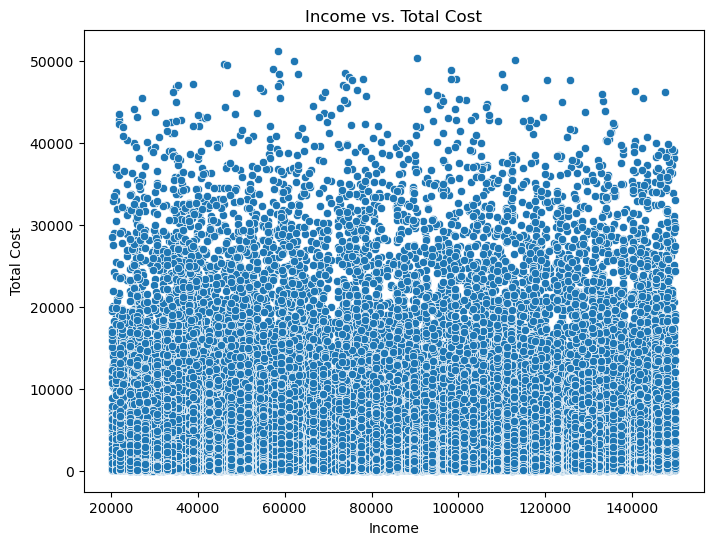

count    1.000000e+03
mean     2.044105e+06
std      3.768120e+05
min      9.602820e+05
25%      1.773169e+06
50%      2.033515e+06
75%      2.283818e+06
max      3.459939e+06
Name: total_cost, dtype: float64


In [7]:
# 5. Scatter Plot of Income vs. Total Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='total_cost', data=merged_df)
plt.title("Income vs. Total Cost")
plt.xlabel("Income")
plt.ylabel("Total Cost")
plt.show()

# Calculate Customer Lifetime Value (CLTV)
# Assuming an average customer lifespan of 3 years and a discount rate of 5%
discount_rate = 0.05
customer_lifetime_value = merged_df.groupby('customer_id')['total_cost'].sum() / (1 - (1 / (1 + discount_rate)**3))
print(customer_lifetime_value.describe())  # Summary statistics of CLTV

In [ ]:
# Bar plot visualization for CLTV by Age Group

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\1028121651.py:18: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\1028121651.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\1028121651.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_by_age_group = merged_df.groupby('age_group')['total_revenue'

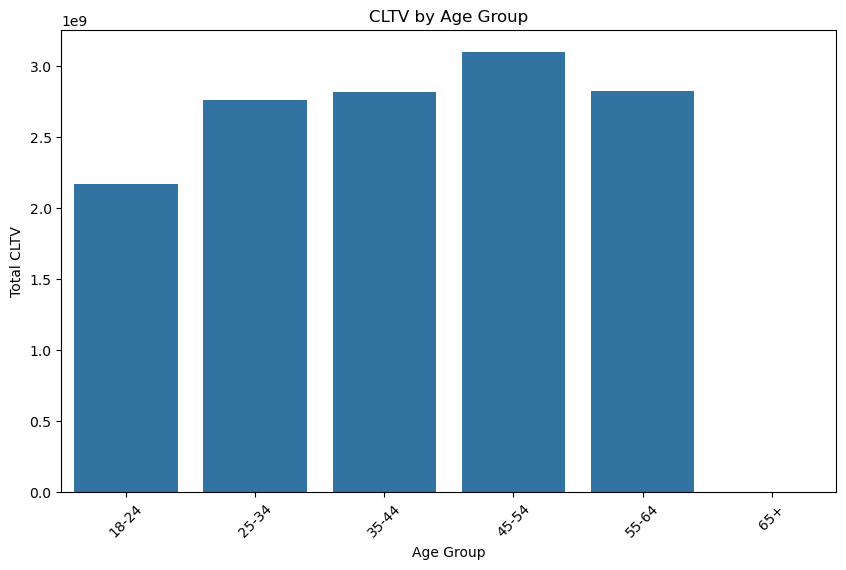

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Calculate total revenue per customer
customer_revenue = merged_df.groupby('customer_id')['total_cost'].sum().reset_index(name='total_revenue')

# Merge total revenue back to the main DataFrame
merged_df = pd.merge(merged_df, customer_revenue, on='customer_id', how='left')

# Create age groups
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

# Calculate total CLTV per age group
cltv_by_age_group = merged_df.groupby('age_group')['total_revenue'].sum()

# Create a new DataFrame for the bar plot
cltv_df = pd.DataFrame({'Age Group': cltv_by_age_group.index, 'CLTV': cltv_by_age_group.values})

# Create bar plot for CLTV by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='CLTV', data=cltv_df)
plt.title("CLTV by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total CLTV")
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1168\3555140483.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='total_cost', data=merged_df, estimator=sum, ci=None)


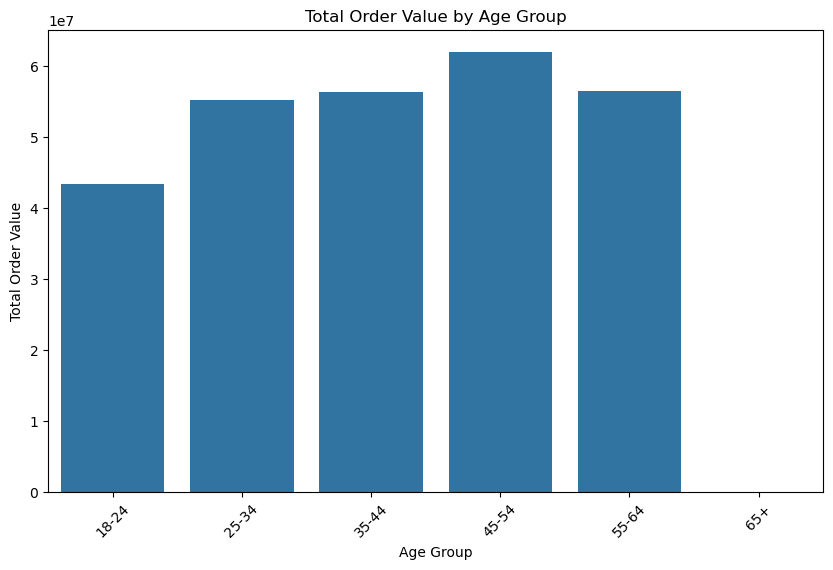

In [4]:
# Create bar plot for Total Order Value by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_cost', data=merged_df, estimator=sum, ci=None) 
plt.title("Total Order Value by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Order Value")
plt.xticks(rotation=45)
plt.show()

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\357756740.py:18: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\357756740.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\357756740.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_by_age_group = merged_df.groupby('age_group')['total_co

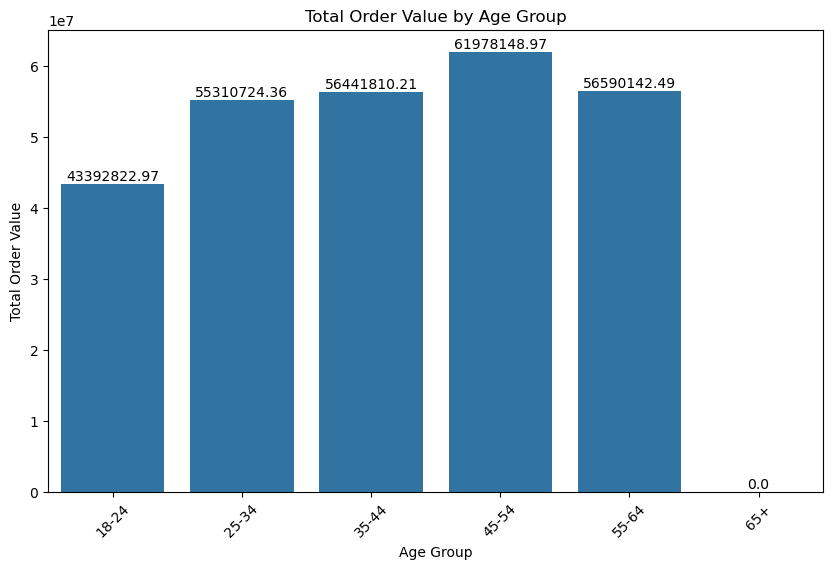

C:\Users\user\AppData\Local\Temp\ipykernel_1168\357756740.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_by_age_group = merged_df.groupby('age_group')['total_revenue'].sum()


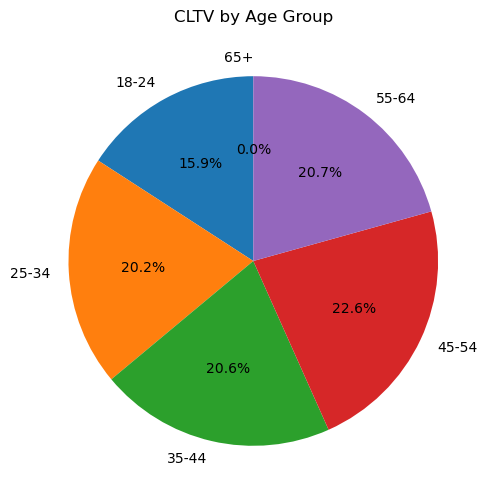

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Calculate total revenue per customer
customer_revenue = merged_df.groupby('customer_id')['total_cost'].sum().reset_index(name='total_revenue')

# Merge total revenue back to the main DataFrame
merged_df = pd.merge(merged_df, customer_revenue, on='customer_id', how='left')

# Create age groups
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

# Calculate total revenue per age group
total_revenue_by_age_group = merged_df.groupby('age_group')['total_cost'].sum()

# Create bar plot for Total Order Value by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=total_revenue_by_age_group.index, y=total_revenue_by_age_group.values)
plt.title("Total Order Value by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Order Value")
plt.xticks(rotation=45)

# Annotate bars with numerical values
for i, v in enumerate(total_revenue_by_age_group.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom') 

plt.show()

# Create pie chart for CLTV by Age Group
cltv_by_age_group = merged_df.groupby('age_group')['total_revenue'].sum()
plt.figure(figsize=(8, 6))
plt.pie(cltv_by_age_group, labels=cltv_by_age_group.index, autopct='%1.1f%%', startangle=90)
plt.title("CLTV by Age Group")
plt.show()

# ... (rest of your EDA and CLTV code)

In [ ]:
# Pair plots visualization

<Figure size 1000x800 with 0 Axes>

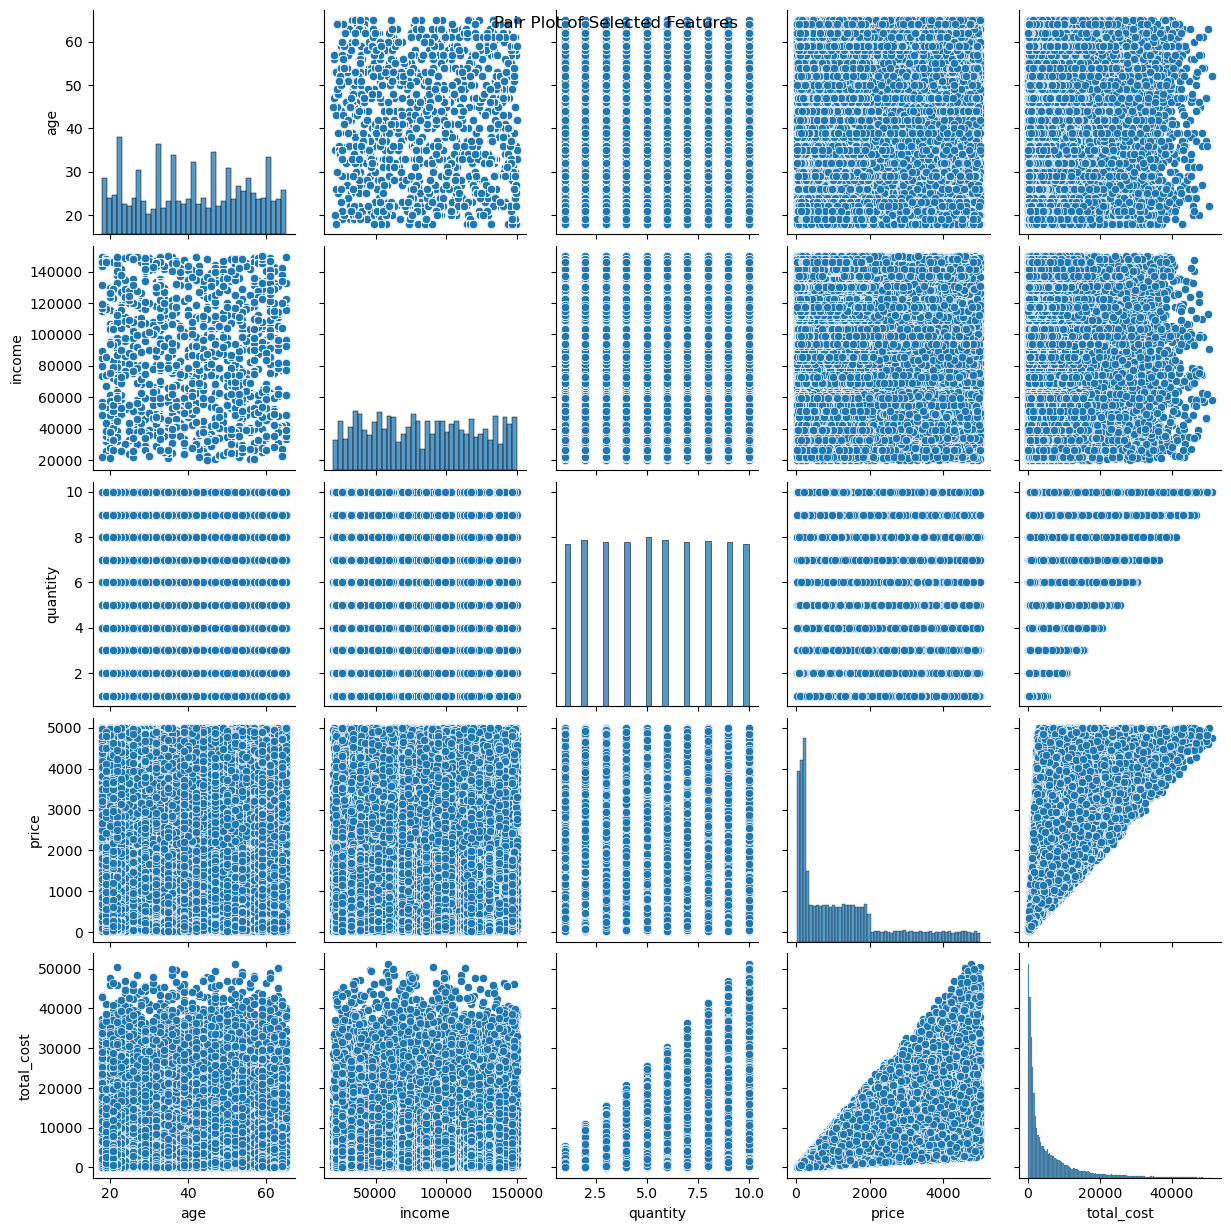

In [13]:
# Select relevant features for pairplot
selected_features = ['age', 'income', 'quantity', 'price', 'total_cost']
pairplot_df = merged_df[selected_features]

# Create Pair Plot
plt.figure(figsize=(12, 10))
sns.pairplot(pairplot_df)
plt.suptitle("Pair Plot of Selected Features")
plt.show()

In [ ]:
# Correlation Heatmap

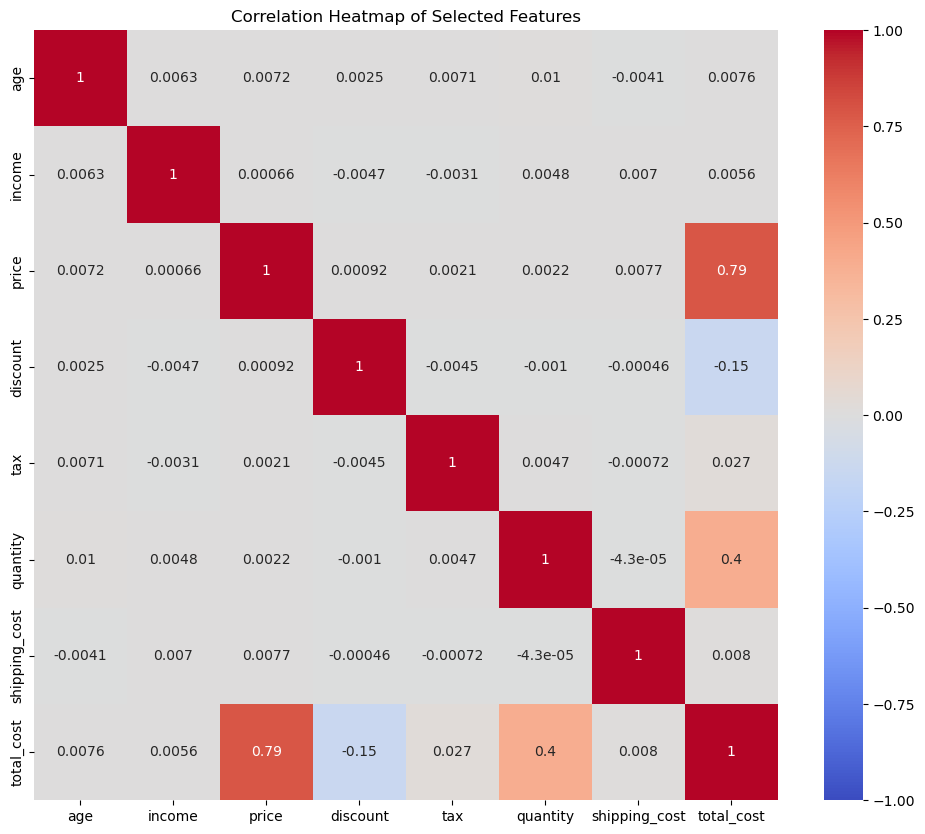

In [33]:
# Select relevant numerical columns for correlation analysis
selected_columns = ['age', 'income', 'price', 'discount', 'tax', 'quantity', 'shipping_cost', 'total_cost']
correlation_matrix = merged_df[selected_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


In [51]:
# Top 10 most selling products
top_10_products = merged_df['product_name'].value_counts().head(10)
print("\nTop 10 Most Selling Products:\n", top_10_products)

# Top 3 countries making the most sales
top_3_countries = merged_df.groupby('country')['total_cost'].sum().nlargest(3)
print("\nTop 3 Countries with Highest Sales:\n", top_3_countries)


Top 10 Most Selling Products:
 product_name
Sports Shoes        1763
Wireless Speaker    1717
T-Shirt             1715
Wall Art            1707
Activewear Set      1707
Curtains            1695
Furniture           1695
Jeans               1692
Headphones          1691
Smartphone          1689
Name: count, dtype: int64

Top 3 Countries with Highest Sales:
 country
Colombia    7.847921e+07
Chile       7.050761e+07
Mexico      6.516394e+07
Name: total_cost, dtype: float64


In [36]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'MACHINE LEARNING MODELS'
     '</div>')

In [76]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Linear Regression Model I'
     '</div>')

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv")
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year
merged_df['order_month'] = merged_df['order_date'].dt.month

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\104955422.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\104955422.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


In [43]:
# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']]
y = merged_df['total_cost']

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [48]:
# Calculate other evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 10822352.317424774
Root Mean Squared Error (RMSE): 3289.734384023241
Mean Absolute Error (MAE): 2217.369284763747
Mean Absolute Percentage Error (MAPE): 3.3037895983611714
R-squared: 0.8001964790851444


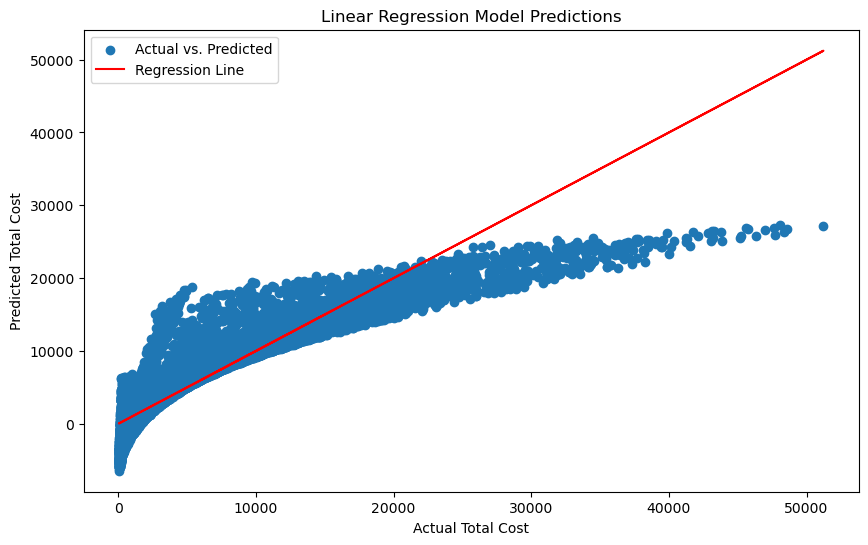

In [49]:
# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("Linear Regression Model Predictions")
plt.legend()
plt.show()

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year 
merged_df['order_month'] = merged_df['order_date'].dt.month

# Create age groups
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

# Create income groups
income_bins = [0, 50000, 100000, 150000, float('inf')]
income_labels = ['Low', 'Medium', 'High', 'Very High']
merged_df['income_group'] = pd.cut(merged_df['income'], bins=income_bins, labels=income_labels)

# Function to find top 3 selling products by group
def top_3_products_by_group(df, group_col):
    return df.groupby([group_col, 'product_name'])['quantity'].sum().groupby(level=0).nlargest(10)

# Top 3 selling products by age group
top_3_by_age = top_3_products_by_group(merged_df, 'age_group')
print("\nTop 10 Selling Products by Age Group:\n", top_3_by_age)

# Top 3 selling products by income group
top_3_by_income = top_3_products_by_group(merged_df, 'income_group')
print("\nTop 3 Selling Products by Income Group:\n", top_3_by_income)

# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']] 
y = merged_df['total_cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\1802604311.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\1802604311.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')



Top 10 Selling Products by Age Group:
 age_group  age_group  product_name           
18-24      18-24      Tablet                     1575
                      Sports Shoes               1556
                      Jacket                     1547
                      Gaming Console             1533
                      Activewear Set             1530
                      Lighting                   1497
                      Appliance Set              1496
                      Sweater                    1488
                      Curtains                   1487
                      Skirt                      1476
25-34      25-34      Jeans                      2020
                      Virtual Reality Headset    1927
                      Furniture                  1924
                      Jacket                     1917
                      Wireless Speaker           1917
                      Curtains                   1901
                      Bedding                    1

C:\Users\user\AppData\Local\Temp\ipykernel_1168\1802604311.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby([group_col, 'product_name'])['quantity'].sum().groupby(level=0).nlargest(10)
C:\Users\user\AppData\Local\Temp\ipykernel_1168\1802604311.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby([group_col, 'product_name'])['quantity'].sum().groupby(level=0).nlargest(10)
C:\Users\user\AppData\Local\Temp\ipykernel_1168\1802604311.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

In [77]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Linear Regression Model II'
     '</div>')

Mean Squared Error (MSE): 10822352.317424774
Root Mean Squared Error (RMSE): 3289.734384023241
Mean Absolute Error (MAE): 2217.369284763747
Mean Absolute Percentage Error (MAPE): 3.3037895983611714
R-squared: 0.8001964790851444


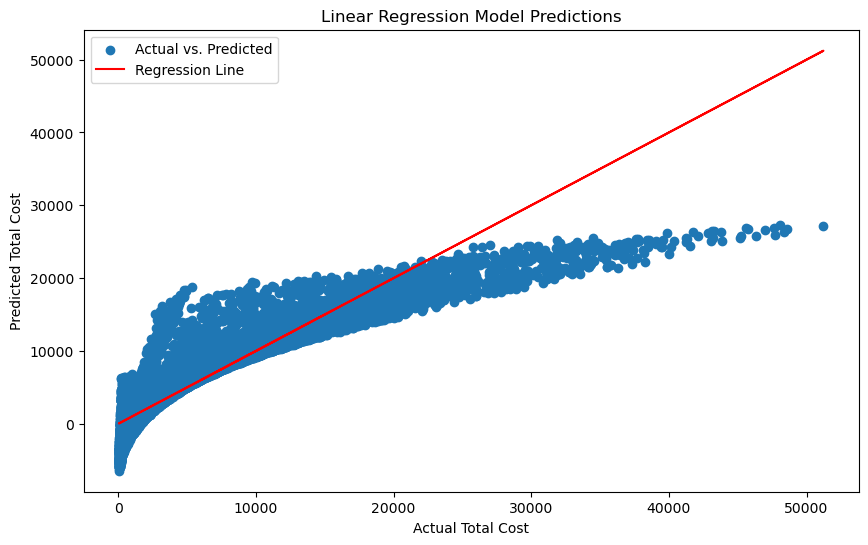

In [69]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line") 
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("Linear Regression Model Predictions")
plt.legend()
plt.show()

In [78]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Random Forest Regression Model'
     '</div>')

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year 
merged_df['order_month'] = merged_df['order_date'].dt.month

# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']] 
y = merged_df['total_cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\479618611.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\479618611.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


Mean Squared Error (MSE): 53022.04679290407
Mean Absolute Error (MAE): 115.95453573689306
Mean Absolute Percentage Error (MAPE): 0.02904462393464937
R-squared: 0.9990211008360652


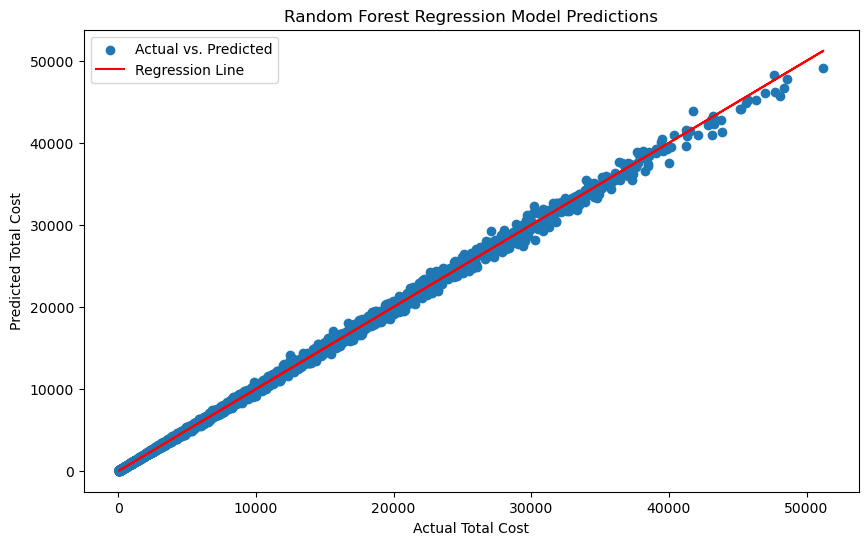

In [71]:
# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("Random Forest Regression Model Predictions")
plt.legend()
plt.show()

In [79]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'K-Nearest Neighbors Regression Model'
     '</div>')

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year 
merged_df['order_month'] = merged_df['order_date'].dt.month

# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']] 
y = merged_df['total_cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the K-Nearest Neighbors Regression Model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\2358139858.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\2358139858.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


Mean Squared Error (MSE): 187116.5711837776
Mean Absolute Error (MAE): 211.99144822970004
Mean Absolute Percentage Error (MAPE): 0.04873995725537754
R-squared: 0.9965454322085007


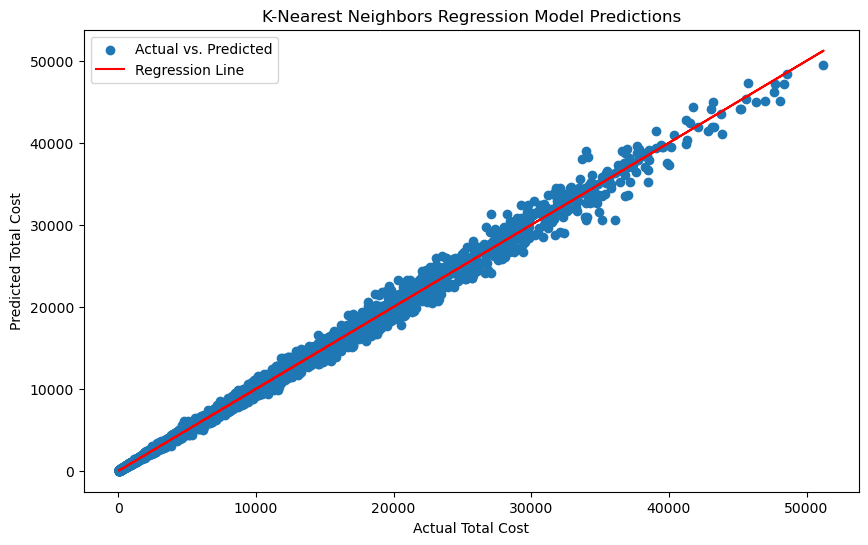

In [84]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("K-Nearest Neighbors Regression Model Predictions")
plt.legend()
plt.show()

In [80]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Decision Tree Regressor Model'
     '</div>')

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year 
merged_df['order_month'] = merged_df['order_date'].dt.month

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\618958823.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\618958823.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


In [82]:
# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']] 
y = merged_df['total_cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the Decision Tree Regression Model
model = DecisionTreeRegressor(random_state=42) 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Mean Squared Error (MSE): 187116.5711837776
Mean Absolute Error (MAE): 211.99144822970004
Mean Absolute Percentage Error (MAPE): 0.04873995725537754
R-squared: 0.9965454322085007


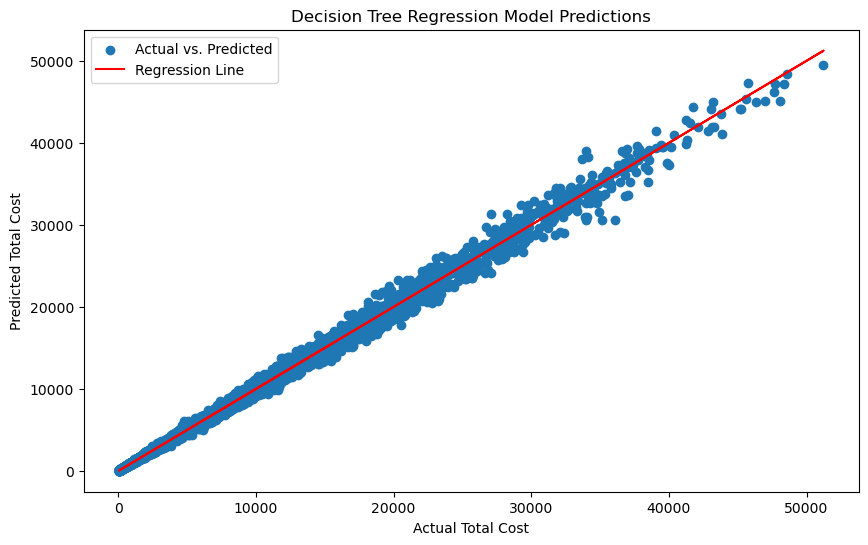

In [83]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("Decision Tree Regression Model Predictions")
plt.legend()
plt.show()

In [85]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'SVR Model'
     '</div>')

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year 
merged_df['order_month'] = merged_df['order_date'].dt.month

Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\1122787310.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\1122787310.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


In [88]:
# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']] 
y = merged_df['total_cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the Support Vector Regression Model
model = SVR() 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Mean Squared Error (MSE): 64408856.678529456
Mean Absolute Error (MAE): 4697.822964812262
Mean Absolute Percentage Error (MAPE): 2.6065314930044865
R-squared: -0.18912376579630386


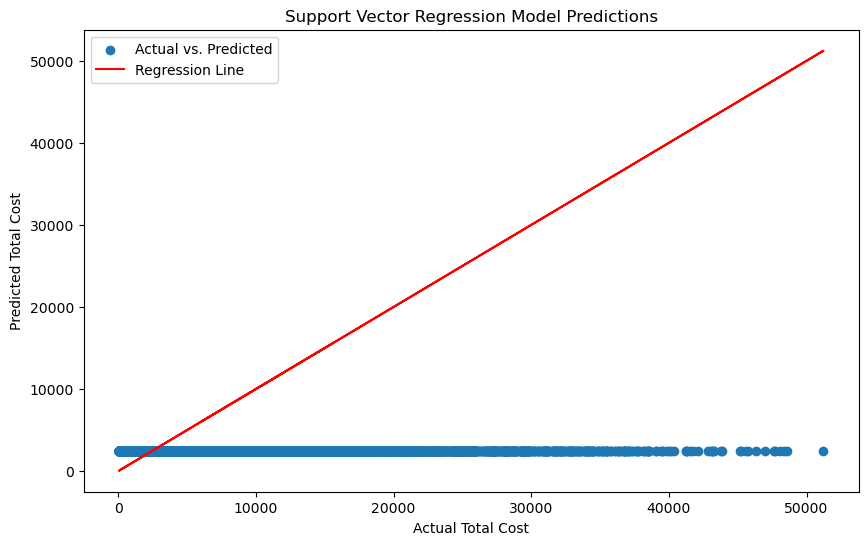

In [89]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("Support Vector Regression Model Predictions")
plt.legend()
plt.show()

In [97]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'LGBM Regressor Model'
     '</div>')

In [99]:
!pip install lightgbm

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the merged data
try:
    merged_df = pd.read_csv("merged_data.csv") 
except FileNotFoundError:
    print("Error: 'merged_data.csv' file not found. Please check the file path.")
    exit()

# Convert 'order_date' and 'shipping_date' to datetime64 (handling potential errors)
try:
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d-%m-%Y')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], format='%d-%m-%Y')
except ValueError:
    print("Falling back to inferring date formats...")
    merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
    merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')

# Calculate total cost per order
merged_df['total_cost'] = (merged_df['price'] * merged_df['quantity']) * (1 - merged_df['discount']) * (1 + merged_df['tax']) + merged_df['shipping_cost']

# Feature Engineering
merged_df['order_year'] = merged_df['order_date'].dt.year 
merged_df['order_month'] = merged_df['order_date'].dt.month

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.4 MB/s eta 0:00:00
Falling back to inferring date formats...


C:\Users\user\AppData\Local\Temp\ipykernel_1168\611609322.py:23: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_1168\611609322.py:24: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['shipping_date'] = pd.to_datetime(merged_df['shipping_date'], errors='coerce')


In [100]:
# Select features and target variable
X = merged_df[['age', 'income', 'quantity', 'price', 'discount', 'tax', 'order_year', 'order_month']] 
y = merged_df['total_cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer (strategy='mean')
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the LightGBM Regression Model
model = LGBMRegressor(random_state=42) 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Info] Start training from score 5549.819310


Mean Squared Error (MSE): 31766.064320455724
Mean Absolute Error (MAE): 108.33597644044941
Mean Absolute Percentage Error (MAPE): 0.04856632695417181
R-squared: 0.9994135312443473


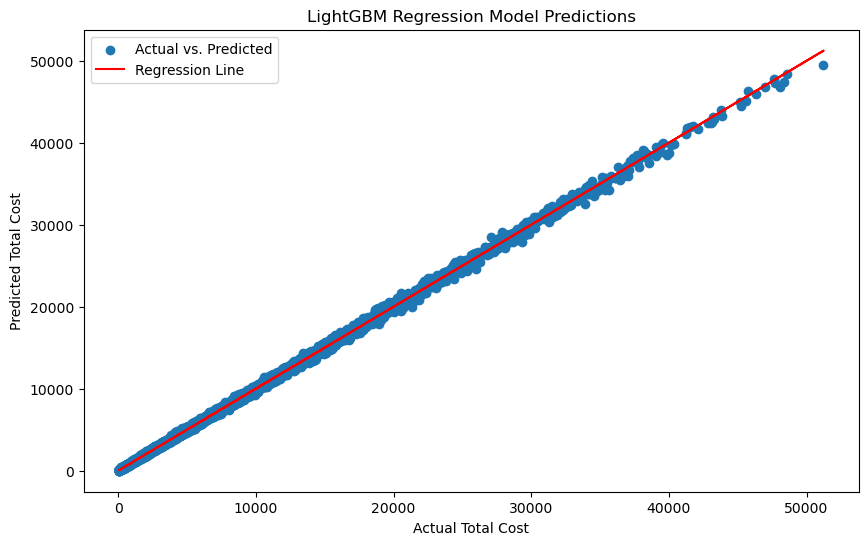

In [102]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot(y_test, y_test, color='red', label="Regression Line")
plt.xlabel("Actual Total Cost")
plt.ylabel("Predicted Total Cost")
plt.title("LightGBM Regression Model Predictions")
plt.legend()
plt.show()